In [490]:
import pandas as pd

Data Importing:

In [491]:
dt = pd.read_excel('/Users/aslidonmez/Desktop/shampoo_tweet_filtered_merged_23042024.xlsx')

In [492]:
data = pd.DataFrame(dt)
data.columns
data


,tweet_text,keyword,boykot,israil,tweet_date,lang,retweet_count,quote_count,like_count,reply_count,impression_count,emotions,gender,age_group,location,group,emotions_parsed,description,following_count,followers_count
0,Hediye zamanı!🎁\n\nBir yıllık Elidor saç bakım...,elidor,0,0,2022-06-21 12:01:53,tur,5468,450.0,6382,11802,0.0,[],male,19-29,NaN,Unilever,[],Watsons çağırıyor seni! 📣💗\nWatsons’ın rengare...,57.0,227545.0
1,💢 Unilever Ürünleri ⚠️\n\n• Lipton • Lipton I...,elidor,0,0,2024-02-10 10:08:00,tur,4597,141.0,8099,288,NaN,[],NaN,NaN,NaN,Unilever,[],NaN,NaN,NaN
2,💢 Unilever Ürünleri ⚠️\n\n• Lipton • Lipton I...,clear,0,0,2024-02-10 10:08:00,tur,4597,141.0,8099,288,NaN,[],NaN,NaN,NaN,Unilever,[],NaN,NaN,NaN
3,💢 Unilever Ürünleri ⚠️\n\n• Lipton • Lipton I...,dove,0,0,2024-02-10 10:08:00,tur,4597,141.0,8099,288,NaN,[],NaN,NaN,NaN,Unilever,[],NaN,NaN,NaN
4,Bağlı olduğunuz WiFi ağının şifresini unuttuys...,clear,0,0,2021-12-16 15:55:06,tur,3692,72.0,38394,113,0.0,['notr'],male,>=40,NaN,Unilever,['notr'],iş birliği ve öneri için dm 📩 (parody account),5.0,461356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7860,@aykutsahiiin Ben clean&amp;clear ve nivea kul...,clear,0,0,2023-05-29 18:02:44,tur,1,0.0,1,1,48.0,['notr'],female,19-29,1.0,Unilever,['notr'],keşke bende sizin düşündüğünüz gibi olsam,308.0,3698.0
7861,"Turuncu Elidor, senden de nefret ediyorum.",elidor,0,0,2021-09-29 08:04:02,tur,1,0.0,3,0,0.0,['ofke'],male,<=18,23.0,Unilever,['ofke'],D'❤️ ɪ̇sʟâᴍ ʜᴜᴋᴜᴋᴜ ʏʟ,40.0,140.0
7862,@Yigiterfatih771 işte Inna'nın kendini gösterd...,clear,0,0,2018-05-27 21:11:09,tur,1,0.0,1,0,0.0,[],male,>=40,NaN,Unilever,[],Clear Türkiye Resmi Twitter Sayfası,7.0,5688.0
7863,"""şimdi 5 Meyem gücümdeyim"" #elidor :)))",elidor,0,0,2015-08-19 19:55:07,tur,1,0.0,1,0,0.0,[],male,>=40,NaN,Unilever,[],Ömürlük saçmalama ihtiyacımı gidermek için bur...,52.0,142.0


GENDER VS EMOTION IN GENERAL

In [493]:
gender = data['gender']
gender_df = pd.DataFrame(gender)
emotion = data['emotions']
emotion_df = pd.DataFrame(emotion)
gender_emotion = pd.concat([emotion_df, gender_df], axis=1)
df_cleaned = gender_emotion[gender_emotion['emotions'].apply(len) > 2]
dataa = df_cleaned.dropna(how='any')
dataa = dataa.explode('emotions')


In [494]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [495]:
crosstab = pd.crosstab(dataa['gender'], dataa['emotions'])
crosstab

emotions,"['arzu', 'onaylamama']",['arzu'],"['igrenme', 'onaylamama']",['igrenme'],"['kaygi', 'umutsuzluk']",['kaygi'],['korku'],"['minnet', 'onaylamama']",['minnet'],"['mutluluk', 'minnet']",...,"['umut', 'arzu']",['umut'],['umutsuzluk'],"['uzuntu', 'arzu']","['uzuntu', 'ofke', 'onaylamama']","['uzuntu', 'ofke']","['uzuntu', 'onaylamama']","['uzuntu', 'pismanlik']","['uzuntu', 'umutsuzluk']",['uzuntu']
gender,,,,,,,,,,,,,,,,,,,,,
female,1,13,1,13,0,0,0,1,7,1,...,3,3,1,0,0,8,0,1,0,23
male,0,12,4,12,1,2,2,0,6,6,...,0,6,0,1,1,3,1,0,2,37


In [496]:
negative_emotions = ['onaylamama', 'ofke', 'uzuntu', 'pismanlik', 'saskinlik', 'igrenme', 'kaygi', 'umutsuzluk']
positive_emotions = ['arzu', 'mutluluk', 'minnet', 'umut', 'sevgi', 'onaylama']

def label_emotions(emotion_list):
    labels = []

    for emotions in emotion_list:
        is_positive = any(word in emotions.lower() for word in positive_emotions)
        is_negative = any(word in emotions.lower() for word in negative_emotions)
        
        if is_positive and not is_negative:
            labels.append('positive')
        elif not is_positive and is_negative:
            labels.append('negative')
        elif is_negative and is_negative:
            labels.append('negative')
        elif is_positive and is_positive:
            labels.append('positive')
        else:
            labels.append('notr')

    return labels

dataa['label'] = label_emotions(dataa['emotions'])

neg_pos_data_general = dataa[dataa['label'] != 'notr']
neg_pos_data_general

,emotions,gender,label
20,['onaylamama'],male,negative
22,['ofke'],male,negative
26,"['ofke', 'igrenme']",female,negative
27,['onaylamama'],male,negative
30,['mutluluk'],male,positive
...,...,...,...
7839,['mutluluk'],female,positive
7843,['ofke'],male,negative
7849,['ofke'],female,negative
7851,"['ofke', 'onaylamama']",male,negative


HYPOTHESIS TESTING

H0: There is no difference in the proportion of negative Tweets between males and females. H1: There is a difference in the proportion of negative Tweets between males and females.

In [497]:
contingency_table = pd.crosstab(neg_pos_data['gender'], neg_pos_data['label'])
contingency_table


label,negative,pozitive
gender,,
female,346,198
male,544,203


In [498]:
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 12.073701176242736
P-value: 0.0005113807728652834


Since the p-value (0.00051) is less than the significance level (typically 0.05), we reject the null hypothesis.This indicates that there is a statistically significant association between gender and emotion labels in the dataset.

BRAND BASE EMOTION

In [499]:
all_brands=data["keyword"]
all_brands_df = pd.DataFrame(all_brands)
emotion = data['emotions']
emotion_df = pd.DataFrame(emotion)
brand_emotion = pd.concat([emotion_df,all_brands_df], axis=1)
b_e_cleaned = brand_emotion[brand_emotion['emotions'].apply(len) > 2]
b_e_cleaned


,emotions,keyword
4,['notr'],clear
5,['notr'],elidor
6,['notr'],clear
7,['notr'],dove
8,['notr'],dove
...,...,...
7855,['notr'],elidor
7857,['ofke'],dove
7860,['notr'],clear
7861,['ofke'],elidor


In [500]:
data_exploded = b_e_cleaned.explode('emotions')
emotion_counts = data_exploded.groupby(['keyword', 'emotions']).size().unstack(fill_value=0)
emotion_counts

emotions,"['arzu', 'onaylamama']",['arzu'],"['igrenme', 'onaylamama']",['igrenme'],"['kaygi', 'umutsuzluk']",['kaygi'],"['korku', 'ofke']",['korku'],"['minnet', 'onaylamama']",['minnet'],...,"['umut', 'arzu']",['umut'],['umutsuzluk'],"['uzuntu', 'arzu']","['uzuntu', 'ofke', 'onaylamama']","['uzuntu', 'ofke']","['uzuntu', 'onaylamama']","['uzuntu', 'pismanlik']","['uzuntu', 'umutsuzluk']",['uzuntu']
keyword,,,,,,,,,,,,,,,,,,,,,
clear,0,8,0,7,1,1,0,1,0,4,...,1,8,0,0,0,0,0,1,2,20
dove,0,7,0,5,0,1,0,0,0,8,...,1,2,0,0,0,6,0,1,1,15
elidor,1,6,1,9,0,0,0,0,0,1,...,0,2,0,0,1,1,0,0,0,18
elseve,0,0,0,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,3
head-shoulders,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
herbal-essences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pantene,1,15,5,10,0,0,1,2,1,2,...,3,4,1,1,0,5,1,0,1,21


In [501]:
b_e_cleaned['label'] = label_emotions(b_e_cleaned['emotions'])

neg_pos_data_brand = b_e_cleaned[b_e_cleaned['label'] != 'notr']
negpos_counts = neg_pos_data_brand.groupby(['keyword', 'label']).size().unstack(fill_value=0)
negpos_counts

/var/folders/r_/k70h_v6j2vn5_5x0t4jwzplc0000gn/T/ipykernel_72091/1901525698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_e_cleaned['label'] = label_emotions(b_e_cleaned['emotions'])


label,negative,positive
keyword,,
clear,334,97
dove,295,96
elidor,277,132
elseve,30,25
head-shoulders,12,5
herbal-essences,4,3
pantene,371,188


In [502]:
tweeter_des = data['description']
brand_names = ["Clear","Dove","Elidor","Elseve","Head-Shoulders","Herbal-Essences","Pantene"]
def contains_brand(description):
    if isinstance(description, str):
        return any(brand in description for brand in brand_names)
    return False

brand_page = data[data['description'].apply(contains_brand)]

followers_count = brand_page.groupby('description')['followers_count'].first().reset_index()

followers_count['keyword']=['clear', 'dove', 'elidor']

merged_followers = pd.merge(negpos_counts,followers_count , on='keyword')
merged_followers 


,keyword,negative,positive,description,followers_count
0,clear,334,97,Clear Türkiye Resmi Twitter Sayfası,5688.0
1,dove,295,96,Dove Türkiye resmi Twitter hesabıdır - Dove il...,20317.0
2,elidor,277,132,Elidor Türkiye resmi Twitter hesabı - Kampanya...,27406.0


Hypothesis : Brands with more followers have a higher number of positive comments.

In [503]:
X = merged_followers['followers_count']
y = merged_followers['positive']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               positive   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.172
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.475
Time:                        19:44:46   Log-Likelihood:                -11.547
No. Observations:                   3   AIC:                             27.09
Df Residuals:                       1   BIC:                             25.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              84.1243     25.084      3.354      0.184    -234.594     402.843
followers_count     0.0014      0.001      1.082      0.475      -0.015       0.017
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.923
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                          -0.586   Prob(JB):                        0.797
Kurtosis:                       1.500   Cond. No.                     4.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

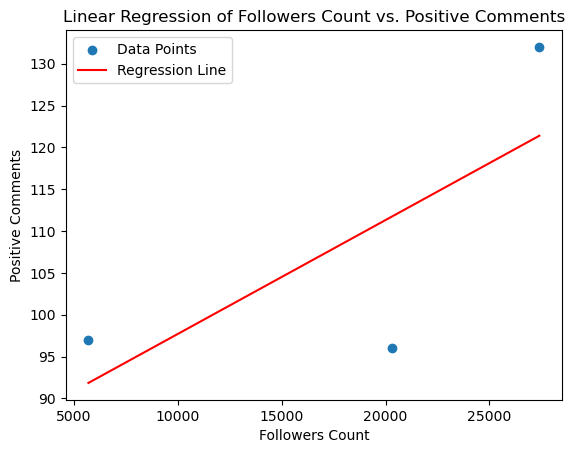

In [504]:
plt.scatter(merged_followers['followers_count'], merged_followers['positive'], label='Data Points')
plt.plot(merged_followers['followers_count'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Followers Count')
plt.ylabel('Positive Comments')
plt.title('Linear Regression of Followers Count vs. Positive Comments')
plt.legend()
plt.show()

In [505]:
X = merged_followers['followers_count']
y = merged_followers['negative']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               negative   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     7227.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00749
Time:                        19:44:47   Log-Likelihood:               -0.43623
No. Observations:                   3   AIC:                             4.872
Df Residuals:                       1   BIC:                             3.070
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             348.8371      0.618    564.498      0.001     340.985     356.689
followers_count    -0.0026   3.09e-05    -85.009      0.007      -0.003      -0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.923
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                          -0.586   Prob(JB):                        0.797
Kurtosis:                       1.500   Cond. No.                     4.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

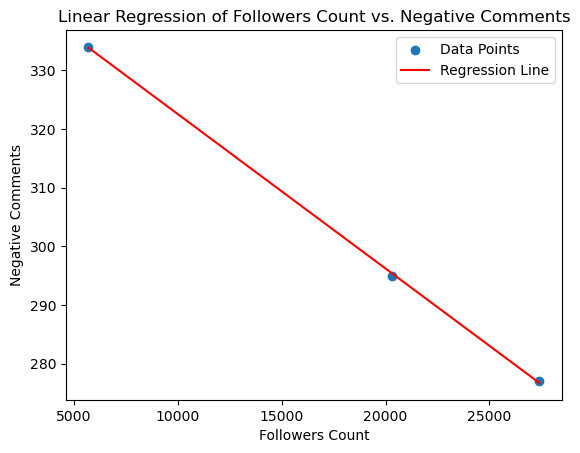

In [506]:
plt.scatter(merged_followers['followers_count'], merged_followers['negative'], label='Data Points')
plt.plot(merged_followers['followers_count'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Followers Count')
plt.ylabel('Negative Comments')
plt.title('Linear Regression of Followers Count vs. Negative Comments')
plt.legend()
plt.show()

In [507]:
brand_page['Total Interaction'] = (brand_page['retweet_count'] + 
                                   brand_page['quote_count'] + 
                                   brand_page['like_count'] + 
                                   brand_page['reply_count'])

total_interactions = brand_page.groupby('keyword')['Total Interaction'].sum().reset_index()
merged_total = pd.merge(merged_followers ,total_interactions, on='keyword')
merged_total

/var/folders/r_/k70h_v6j2vn5_5x0t4jwzplc0000gn/T/ipykernel_72091/3778188146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_page['Total Interaction'] = (brand_page['retweet_count'] +


,keyword,negative,positive,description,followers_count,Total Interaction
0,clear,334,97,Clear Türkiye Resmi Twitter Sayfası,5688.0,30652.0
1,dove,295,96,Dove Türkiye resmi Twitter hesabıdır - Dove il...,20317.0,13672.0
2,elidor,277,132,Elidor Türkiye resmi Twitter hesabı - Kampanya...,27406.0,39366.0


In [508]:
X = merged_total['followers_count']
y = merged_total['Total Interaction']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total Interaction   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.960
Method:                 Least Squares   F-statistic:                   0.02048
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.910
Time:                        19:44:47   Log-Likelihood:                -32.052
No. Observations:                   3   AIC:                             68.10
Df Residuals:                       1   BIC:                             66.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.492e+04   2.33e+04      1.069      0.479   -2.71e+05    3.21e+05
followers_count     0.1671      1.168      0.143      0.910     -14.673      15.007
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.923
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                          -0.586   Prob(JB):                        0.797
Kurtosis:                       1.500   Cond. No.                     4.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

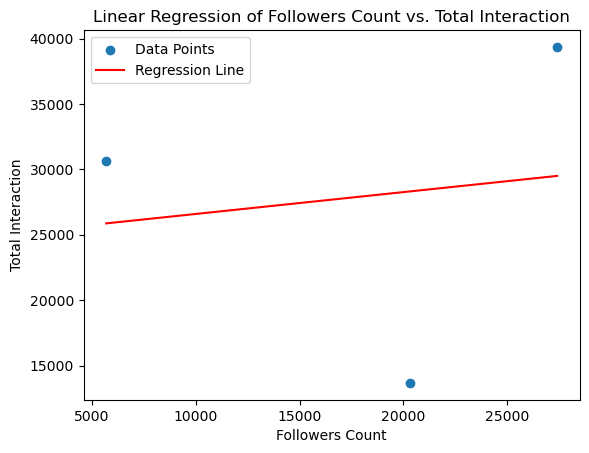

In [509]:
plt.scatter(merged_total['followers_count'], merged_total['Total Interaction'], label='Data Points')
plt.plot(merged_total['followers_count'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Followers Count')
plt.ylabel('Total Interaction')
plt.title('Linear Regression of Followers Count vs. Total Interaction')
plt.legend()
plt.show()

MACHINE LEARNING

EMOTION PREDICTION

In [510]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


KNN 

In [511]:

X_train, X_test, y_train, y_test = train_test_split(data['tweet_text'], data['emotions'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tfidf, y_train)


y_pred = knn.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6936440677966101
Classification Report:
                                    precision    recall  f1-score   support

                         ['arzu']       1.00      0.15      0.27        13
        ['igrenme', 'onaylamama']       0.00      0.00      0.00         1
                      ['igrenme']       0.00      0.00      0.00        11
                        ['kaygi']       0.00      0.00      0.00         1
                        ['korku']       0.00      0.00      0.00         2
         ['minnet', 'onaylamama']       0.00      0.00      0.00         1
                       ['minnet']       0.00      0.00      0.00         4
           ['mutluluk', 'minnet']       0.00      0.00      0.00         7
            ['mutluluk', 'sevgi']       0.75      0.18      0.29        17
             ['mutluluk', 'umut']       0.00      0.00      0.00         1
                     ['mutluluk']       0.00      0.00      0.00        39
                         ['notr']       0.62  

/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


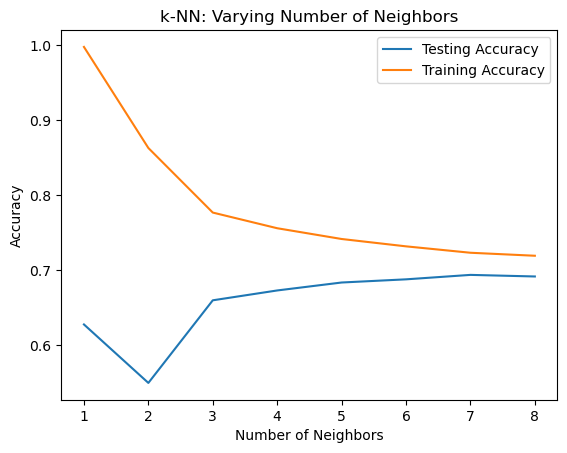

In [512]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_tfidf, y_train)
    
    train_accuracy[i] = knn.score(X_train_tfidf, y_train)


    test_accuracy[i] = knn.score(X_test_tfidf, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


LOGISTIC REGRESSION

In [513]:
X_train, X_test, y_train, y_test = train_test_split(data['tweet_text'], data['emotions'], test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:", report)

Accuracy: 0.701271186440678
Classification Report:                                    precision    recall  f1-score   support

                         ['arzu']       0.00      0.00      0.00        13
        ['igrenme', 'onaylamama']       0.00      0.00      0.00         1
                      ['igrenme']       0.00      0.00      0.00        11
                        ['kaygi']       0.00      0.00      0.00         1
                        ['korku']       0.00      0.00      0.00         2
         ['minnet', 'onaylamama']       0.00      0.00      0.00         1
                       ['minnet']       0.00      0.00      0.00         4
           ['mutluluk', 'minnet']       0.00      0.00      0.00         7
            ['mutluluk', 'sevgi']       0.00      0.00      0.00        17
             ['mutluluk', 'umut']       0.00      0.00      0.00         1
                     ['mutluluk']       0.00      0.00      0.00        39
                         ['notr']       0.90    

/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RANDOM FOREST

In [514]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7122881355932204
                                   precision    recall  f1-score   support

                         ['arzu']       0.00      0.00      0.00        13
        ['igrenme', 'onaylamama']       0.00      0.00      0.00         1
                      ['igrenme']       0.00      0.00      0.00        11
                        ['kaygi']       0.00      0.00      0.00         1
                        ['korku']       0.00      0.00      0.00         2
         ['minnet', 'onaylamama']       0.00      0.00      0.00         1
                       ['minnet']       0.00      0.00      0.00         4
           ['mutluluk', 'minnet']       0.00      0.00      0.00         7
            ['mutluluk', 'sevgi']       0.00      0.00      0.00        17
             ['mutluluk', 'umut']       0.00      0.00      0.00         1
                     ['mutluluk']       0.00      0.00      0.00        39
                         ['notr']       0.90      0.21  

/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CROSS VALIDATION

In [515]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=7)
cv_scores = cross_val_score(knn, X_train_tfidf, y_train, cv=5)
print("KNN Cross-Validation Scores:", cv_scores)
print("KNN Mean CV Score:", np.mean(cv_scores))

model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Logistic Regression Mean CV Score:", np.mean(cv_scores))

rf = RandomForestClassifier()


cv_scores = cross_val_score(rf, X_train_tfidf, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Cross-Validation Scores: [0.70390554 0.68029064 0.69754768 0.70572207 0.69573115]
KNN Mean CV Score: 0.6966394187102634


/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Cross-Validation Scores: [0.70572207 0.70299728 0.70118074 0.70844687 0.70118074]
Logistic Regression Mean CV Score: 0.7039055404178021


/Users/aslidonmez/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.70390554 0.71389646 0.71298819 0.72025431 0.72388738]
Mean CV Score: 0.7149863760217984


NEGATIVE/POSITIVE PREDICTION

KNN

In [516]:
data['label'] = label_emotions(data['emotions'])
pred_data = data[data['label'] != 'notr']


In [517]:

X_train, X_test, y_train, y_test = train_test_split(pred_data['tweet_text'], pred_data['label'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_tfidf, y_train)


y_pred = knn.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8199643493761141
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.94      0.88       406
    positive       0.76      0.50      0.61       155

    accuracy                           0.82       561
   macro avg       0.80      0.72      0.75       561
weighted avg       0.81      0.82      0.81       561



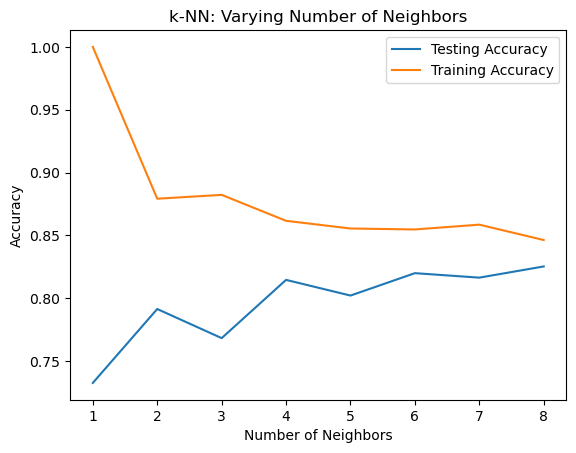

In [518]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_tfidf, y_train)
    
    train_accuracy[i] = knn.score(X_train_tfidf, y_train)


    test_accuracy[i] = knn.score(X_test_tfidf, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

LOGISTIC REGRESSION

In [519]:

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:", report)

Accuracy: 0.8324420677361853
Classification Report:               precision    recall  f1-score   support

    negative       0.82      0.99      0.90       406
    positive       0.93      0.43      0.58       155

    accuracy                           0.83       561
   macro avg       0.87      0.71      0.74       561
weighted avg       0.85      0.83      0.81       561



RANDOM FOREST

In [520]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8360071301247772
              precision    recall  f1-score   support

    negative       0.82      0.99      0.90       406
    positive       0.93      0.43      0.58       155

    accuracy                           0.83       561
   macro avg       0.87      0.71      0.74       561
weighted avg       0.85      0.83      0.81       561



CROSS VALIDATION

In [460]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=7)
cv_scores = cross_val_score(knn, X_train_tfidf, y_train, cv=5)
print("KNN Cross-Validation Scores:", cv_scores)
print("KNN Mean CV Score:", np.mean(cv_scores))

model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores)
print("Logistic Regression Mean CV Score:", np.mean(cv_scores))

rf = RandomForestClassifier()


cv_scores = cross_val_score(rf, X_train_tfidf, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores)
print("Random Forest Mean CV Score:", np.mean(cv_scores))

KNN Cross-Validation Scores: [0.79770992 0.82061069 0.79770992 0.79310345 0.79310345]
KNN Mean CV Score: 0.8004474861805739
Logistic Regression Cross-Validation Scores: [0.7519084  0.77099237 0.77099237 0.77394636 0.75095785]
Logistic Regression Mean CV Score: 0.7637594688660758
Random Forest Cross-Validation Scores: [0.75572519 0.77862595 0.76717557 0.80076628 0.77777778]
Random Forest Mean CV Score: 0.7760141557719867
